In [19]:
import pickle
import pandas as pd
editors = ["pythia","pythia2","gptj"]
datasets = ["sst2","imdb","news"]
corrupters = ["unk","erase","mask","att-zero"]

fine_tune = [True]
results = {}
for editor in editors:
    for ds in datasets:
        for ft in fine_tune:
            with open(f"camel/cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}_0_200.pcl","br") as f:
                df = pd.DataFrame(pickle.load(f))
                # df.to_csv(f"camel_csv/cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}.csv")
                results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"] = df



In [20]:
import pickle
import pandas as pd
datasets = ["sst2","imdb","news"]
fine_tune = [False]
for editor in editors:
    for ds in datasets:
        for ft in fine_tune:
            with open(f"camel/cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}_0_200_zero.pcl","br") as f:
                df = pd.DataFrame(pickle.load(f))
                # df.to_csv(f"camel_csv/cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}_zero.csv")
                results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"] = df



In [21]:
results2 = {}
fine_tune = [False]
for ds in datasets:
    for ft in fine_tune:
        with open(f"camel_mask2/{ds}_predictor_gemma-2b_ft_{ft}_0_200_zero.pcl","br") as f:
            m = pickle.load(f)
            m["sentence"] = m["sentence"][:200]
            df = pd.DataFrame(m)
            # # df.to_csv(f"camel_csv/cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}_zero.csv")
            results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"] = df


In [22]:
results2

{'sst2_predictor_gemma-2b_ft_False_mask':                                               sentence  \
 0    the film is quiet , threatening and unforgetta...   
 1    confirms the nagging suspicion that ethan hawk...   
 2    uses sharp humor and insight into human nature...   
 3    it gets onto the screen just about as much of ...   
 4    while ( hill ) has learned new tricks , the tr...   
 ..                                                 ...   
 195  sam mendes has become valedictorian at the sch...   
 196  all-in-all , the film is an enjoyable and fran...   
 197           teen movies have really hit the skids .    
 198  his last movie was poetically romantic and ful...   
 199  so , too , is this comedy about mild culture c...   
 
     gradnorm1_masked_sentence_0.1_predictor_gemma-2b_ft_False_unk  \
 0    <bos>In the sentence in triple back ticks what...              
 1    <unk>In the sentence in triple back ticks what...              
 2    <unk>In the sentence in triple ba

In [23]:

fine_tune = [True]
for ds in datasets:
    for ft in fine_tune:
        with open(f"camel_mask2/{ds}_predictor_gemma-2b_ft_{ft}_0_200.pcl","br") as f:
            m = pickle.load(f)
            m["sentence"] = m["sentence"][:200]
            df = pd.DataFrame(m)
            # # df.to_csv(f"camel_csv/cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}_zero.csv")
            results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"] = df


In [5]:
results.keys()

dict_keys(['cfg_pythia_sst2_predictor_gemma-2b_ft_True', 'cfg_pythia_imdb_predictor_gemma-2b_ft_True', 'cfg_pythia_news_predictor_gemma-2b_ft_True', 'cfg_pythia2_sst2_predictor_gemma-2b_ft_True', 'cfg_pythia2_imdb_predictor_gemma-2b_ft_True', 'cfg_pythia2_news_predictor_gemma-2b_ft_True', 'cfg_gptj_sst2_predictor_gemma-2b_ft_True', 'cfg_gptj_imdb_predictor_gemma-2b_ft_True', 'cfg_gptj_news_predictor_gemma-2b_ft_True', 'cfg_pythia_sst2_predictor_gemma-2b_ft_False', 'cfg_pythia_imdb_predictor_gemma-2b_ft_False', 'cfg_pythia_news_predictor_gemma-2b_ft_False', 'cfg_pythia2_sst2_predictor_gemma-2b_ft_False', 'cfg_pythia2_imdb_predictor_gemma-2b_ft_False', 'cfg_pythia2_news_predictor_gemma-2b_ft_False', 'cfg_gptj_sst2_predictor_gemma-2b_ft_False', 'cfg_gptj_imdb_predictor_gemma-2b_ft_False', 'cfg_gptj_news_predictor_gemma-2b_ft_False'])

In [24]:
results2['sst2_predictor_gemma-2b_ft_True_mask'].keys()

Index(['sentence',
       'gradnorm1_masked_sentence_0.1_predictor_gemma-2b_ft_True_unk',
       'gradnorm1_masked_sentence_0.2_predictor_gemma-2b_ft_True_unk',
       'gradnorm1_masked_sentence_0.3_predictor_gemma-2b_ft_True_unk',
       'gradnorm1_masked_sentence_0.4_predictor_gemma-2b_ft_True_unk',
       'gradnorm1_masked_sentence_0.5_predictor_gemma-2b_ft_True_unk',
       'gradnorm1_mask_percent_predictor_gemma-2b_ft_True_unk',
       'gradnorm1_succuss_in_flipping_predictor_gemma-2b_ft_True_unk',
       'gradnorm2_masked_sentence_0.1_predictor_gemma-2b_ft_True_unk',
       'gradnorm2_masked_sentence_0.2_predictor_gemma-2b_ft_True_unk',
       ...
       'kernel_shap_masked_sentence_0.5_predictor_gemma-2b_ft_True_att-zero',
       'kernel_shap_mask_percent_predictor_gemma-2b_ft_True_att-zero',
       'kernel_shap_succuss_in_flipping_predictor_gemma-2b_ft_True_att-zero',
       'random_masked_sentence_0.1_predictor_gemma-2b_ft_True_att-zero',
       'random_masked_sentence_0.2_pre

# sst

In [25]:
import numpy as np
from scipy.stats import spearmanr

mask_values = {}
mask_values2 = {}
ds = "sst2"
ft = False
# for editor in editors:
#     # for ds in datasets:
#     #     for ft in fine_tune:
sst_it_corr = np.zeros([7,7]) 
for tip in corrupters:
    mask_columns = []
    for col in results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"].columns:
        if "mask_percent" in col:
            if col.endswith(tip):
                mask_columns.append(col)
    mask_values2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask_{tip}"] = results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"][mask_columns].values


for editor in editors:
    # for ds in datasets:
    #     for ft in fine_tune:
    mask_columns = []
    for col in results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"].columns:
        if "mask_percent" in col:
            mask_columns.append(col)
    mask_values[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"] = results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"][mask_columns].values
a = list(mask_values.keys())
b = list(mask_values2.keys())

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(3):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed2]],axis=1)[i],np.argsort(mask_values[a[ed1]],axis=1)[i]).statistic
 
        sst_it_corr[ed1,ed2] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean():.4f} with {a[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed1]],axis=1)[i],np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
        sst_it_corr[ed1,ed2+3] = rcorr.mean()
        sst_it_corr[ed2+3,ed1] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean():.4f} with {b[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(4):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values2[b[ed1]],axis=1)[i],np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
        sst_it_corr[ed1+3,ed2+3] = rcorr.mean()
        print(f"editor {b[ed1]} has mean corr {rcorr.mean():.4f} with {b[ed2]}")


editor cfg_pythia_sst2_predictor_gemma-2b_ft_False has mean corr 1.0000 with cfg_pythia_sst2_predictor_gemma-2b_ft_False
editor cfg_pythia_sst2_predictor_gemma-2b_ft_False has mean corr 0.7389 with cfg_pythia2_sst2_predictor_gemma-2b_ft_False
editor cfg_pythia_sst2_predictor_gemma-2b_ft_False has mean corr 0.7580 with cfg_gptj_sst2_predictor_gemma-2b_ft_False
editor cfg_pythia2_sst2_predictor_gemma-2b_ft_False has mean corr 0.7389 with cfg_pythia_sst2_predictor_gemma-2b_ft_False
editor cfg_pythia2_sst2_predictor_gemma-2b_ft_False has mean corr 1.0000 with cfg_pythia2_sst2_predictor_gemma-2b_ft_False
editor cfg_pythia2_sst2_predictor_gemma-2b_ft_False has mean corr 0.7362 with cfg_gptj_sst2_predictor_gemma-2b_ft_False
editor cfg_gptj_sst2_predictor_gemma-2b_ft_False has mean corr 0.7580 with cfg_pythia_sst2_predictor_gemma-2b_ft_False
editor cfg_gptj_sst2_predictor_gemma-2b_ft_False has mean corr 0.7362 with cfg_pythia2_sst2_predictor_gemma-2b_ft_False
editor cfg_gptj_sst2_predictor_gem

In [26]:
mask_values = {}
mask_values2 = {}
ft = True
ds = "sst2"
sst_ft_corr = np.zeros([7,7]) 
for editor in editors:
    # for ds in datasets:
    #     for ft in fine_tune:
    mask_columns = []
    for col in results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"].columns:
        if "mask_percent" in col:
            mask_columns.append(col)
    mask_values[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"] = results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"][mask_columns].values

ft = True
# for editor in editors:
#     # for ds in datasets:
#     #     for ft in fine_tune:

for tip in corrupters:
    mask_columns = []
    for col in results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"].columns:
        if "mask_percent" in col:
            if col.endswith(tip):
                mask_columns.append(col)
    mask_values2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask_{tip}"] = results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"][mask_columns].values
a = list(mask_values.keys())
b = list(mask_values2.keys())

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(3):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed2]],axis=1)[i],np.argsort(mask_values[a[ed1]],axis=1)[i]).statistic

        sst_ft_corr[ed1,ed2] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean()} with {a[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed1]],axis=1)[i],np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
        sst_ft_corr[ed1,ed2+3] = rcorr.mean()
        sst_ft_corr[ed2+3,ed1] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean()} with {b[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(4):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values2[b[ed1]],axis=1)[i],
                                 np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
            sst_ft_corr[ed1+3,ed2+3] = rcorr.mean()
        print(f"editor {b[ed1]} has mean corr {rcorr.mean()} with {b[ed2]}")

editor cfg_pythia_sst2_predictor_gemma-2b_ft_True has mean corr 1.0 with cfg_pythia_sst2_predictor_gemma-2b_ft_True
editor cfg_pythia_sst2_predictor_gemma-2b_ft_True has mean corr 0.7941071428571429 with cfg_pythia2_sst2_predictor_gemma-2b_ft_True
editor cfg_pythia_sst2_predictor_gemma-2b_ft_True has mean corr 0.7642857142857145 with cfg_gptj_sst2_predictor_gemma-2b_ft_True
editor cfg_pythia2_sst2_predictor_gemma-2b_ft_True has mean corr 0.7941071428571429 with cfg_pythia_sst2_predictor_gemma-2b_ft_True
editor cfg_pythia2_sst2_predictor_gemma-2b_ft_True has mean corr 1.0 with cfg_pythia2_sst2_predictor_gemma-2b_ft_True
editor cfg_pythia2_sst2_predictor_gemma-2b_ft_True has mean corr 0.7866071428571431 with cfg_gptj_sst2_predictor_gemma-2b_ft_True
editor cfg_gptj_sst2_predictor_gemma-2b_ft_True has mean corr 0.7642857142857145 with cfg_pythia_sst2_predictor_gemma-2b_ft_True
editor cfg_gptj_sst2_predictor_gemma-2b_ft_True has mean corr 0.7866071428571431 with cfg_pythia2_sst2_predictor_g

# imdb

In [27]:
mask_values2 = {}
mask_values = {}
ds = "imdb"
ft = False
# for editor in editors:
#     # for ds in datasets:
#     #     for ft in fine_tune:
imdb_it_corr = np.zeros([7,7]) 
for tip in corrupters:
    mask_columns = []
    for col in results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"].columns:
        if "mask_percent" in col:
            if col.endswith(tip):
                mask_columns.append(col)
    mask_values2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask_{tip}"] = results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"][mask_columns].values


ft = False
for editor in editors:
    # for ds in datasets:
    #     for ft in fine_tune:
    mask_columns = []
    for col in results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"].columns:
        if "mask_percent" in col:
            mask_columns.append(col)
    mask_values[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"] = results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"][mask_columns].values
a = list(mask_values.keys())
b = list(mask_values2.keys())

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(3):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed2]],axis=1)[i],np.argsort(mask_values[a[ed1]],axis=1)[i]).statistic

        imdb_it_corr[ed1,ed2] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean()} with {a[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed1]],axis=1)[i],np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
        imdb_it_corr[ed1,ed2+3] = rcorr.mean()
        imdb_it_corr[ed2+3,ed1] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean()} with {b[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(4):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values2[b[ed1]],axis=1)[i],np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
        imdb_it_corr[ed1+3,ed2+3] = rcorr.mean()
        print(f"editor {b[ed1]} has mean corr {rcorr.mean()} with {b[ed2]}")


editor cfg_pythia_imdb_predictor_gemma-2b_ft_False has mean corr 1.0 with cfg_pythia_imdb_predictor_gemma-2b_ft_False
editor cfg_pythia_imdb_predictor_gemma-2b_ft_False has mean corr 0.6951785714285715 with cfg_pythia2_imdb_predictor_gemma-2b_ft_False
editor cfg_pythia_imdb_predictor_gemma-2b_ft_False has mean corr 0.6494642857142858 with cfg_gptj_imdb_predictor_gemma-2b_ft_False
editor cfg_pythia2_imdb_predictor_gemma-2b_ft_False has mean corr 0.6951785714285715 with cfg_pythia_imdb_predictor_gemma-2b_ft_False
editor cfg_pythia2_imdb_predictor_gemma-2b_ft_False has mean corr 1.0 with cfg_pythia2_imdb_predictor_gemma-2b_ft_False
editor cfg_pythia2_imdb_predictor_gemma-2b_ft_False has mean corr 0.6976785714285714 with cfg_gptj_imdb_predictor_gemma-2b_ft_False
editor cfg_gptj_imdb_predictor_gemma-2b_ft_False has mean corr 0.6494642857142858 with cfg_pythia_imdb_predictor_gemma-2b_ft_False
editor cfg_gptj_imdb_predictor_gemma-2b_ft_False has mean corr 0.6976785714285714 with cfg_pythia2_i

In [28]:
mask_values = {}
mask_values2 = {}

ft = True
imdb_ft_corr = np.zeros([7,7]) 
for editor in editors:
    # for ds in datasets:
    #     for ft in fine_tune:
    mask_columns = []
    for col in results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"].columns:
        if "mask_percent" in col:
            mask_columns.append(col)
    mask_values[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"] = results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"][mask_columns].values

# for editor in editors:
#     # for ds in datasets:
#     #     for ft in fine_tune:

for tip in corrupters:
    mask_columns = []
    for col in results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"].columns:
        if "mask_percent" in col:
            if col.endswith(tip):
                mask_columns.append(col)
    mask_values2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask_{tip}"] = results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"][mask_columns].values
a = list(mask_values.keys())
b = list(mask_values2.keys())

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(3):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed2]],axis=1)[i],np.argsort(mask_values[a[ed1]],axis=1)[i]).statistic

        imdb_ft_corr[ed1,ed2] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean()} with {a[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed1]],axis=1)[i],np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
        imdb_ft_corr[ed1,ed2+3] = rcorr.mean()
        imdb_ft_corr[ed2+3,ed1] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean()} with {b[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(4):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values2[b[ed1]],axis=1)[i],
                                 np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
            imdb_ft_corr[ed1+3,ed2+3] = rcorr.mean()
        print(f"editor {b[ed1]} has mean corr {rcorr.mean()} with {b[ed2]}")

editor cfg_pythia_imdb_predictor_gemma-2b_ft_True has mean corr 1.0 with cfg_pythia_imdb_predictor_gemma-2b_ft_True
editor cfg_pythia_imdb_predictor_gemma-2b_ft_True has mean corr 0.6800000000000002 with cfg_pythia2_imdb_predictor_gemma-2b_ft_True
editor cfg_pythia_imdb_predictor_gemma-2b_ft_True has mean corr 0.6923214285714286 with cfg_gptj_imdb_predictor_gemma-2b_ft_True
editor cfg_pythia2_imdb_predictor_gemma-2b_ft_True has mean corr 0.6800000000000002 with cfg_pythia_imdb_predictor_gemma-2b_ft_True
editor cfg_pythia2_imdb_predictor_gemma-2b_ft_True has mean corr 1.0 with cfg_pythia2_imdb_predictor_gemma-2b_ft_True
editor cfg_pythia2_imdb_predictor_gemma-2b_ft_True has mean corr 0.6894642857142859 with cfg_gptj_imdb_predictor_gemma-2b_ft_True
editor cfg_gptj_imdb_predictor_gemma-2b_ft_True has mean corr 0.6923214285714286 with cfg_pythia_imdb_predictor_gemma-2b_ft_True
editor cfg_gptj_imdb_predictor_gemma-2b_ft_True has mean corr 0.6894642857142859 with cfg_pythia2_imdb_predictor_g

In [29]:
imdb_ft_corr - imdb_it_corr

array([[ 0.        , -0.01517857,  0.04285714,  0.33017857,  0.26017857,
         0.28553571,  0.17857143],
       [-0.01517857,  0.        , -0.00821429,  0.26107143,  0.22392857,
         0.23464286,  0.09857143],
       [ 0.04285714, -0.00821429,  0.        ,  0.28875   ,  0.22446429,
         0.23660714,  0.13732143],
       [ 0.33017857,  0.26107143,  0.28875   ,  0.        ,  0.24053571,
         0.32232143,  0.34875   ],
       [ 0.26017857,  0.22392857,  0.22446429,  0.24053571,  0.        ,
         0.27625   ,  0.26392857],
       [ 0.28553571,  0.23464286,  0.23660714,  0.32232143,  0.27625   ,
         0.        ,  0.28589286],
       [ 0.17857143,  0.09857143,  0.13732143,  0.34875   ,  0.26392857,
         0.28589286,  0.        ]])

# news

In [30]:
mask_values2 = {}
mask_values = {}
ds = "news"
ft = False

news_it_corr = np.zeros([7,7]) 
for tip in corrupters:
    mask_columns = []
    for col in results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"].columns:
        if "mask_percent" in col:
            if col.endswith(tip):
                mask_columns.append(col)
    mask_values2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask_{tip}"] = results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"][mask_columns].values


ft = False
for editor in editors:
    # for ds in datasets:
    #     for ft in fine_tune:
    mask_columns = []
    for col in results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"].columns:
        if "mask_percent" in col:
            mask_columns.append(col)
    mask_values[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"] = results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"][mask_columns].values
a = list(mask_values.keys())
b = list(mask_values2.keys())

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(3):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed2]],axis=1)[i],np.argsort(mask_values[a[ed1]],axis=1)[i]).statistic
        news_it_corr[ed1,ed2] = rcorr.mean() 
        print(f"editor {a[ed1]} has mean corr {rcorr.mean()} with {a[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed1]],axis=1)[i],np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
        news_it_corr[ed1,ed2+3] = rcorr.mean()
        news_it_corr[ed2+3,ed1] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean()} with {b[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(4):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values2[b[ed1]],axis=1)[i],np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
        news_it_corr[ed1+3,ed2+3] = rcorr.mean()
        print(f"editor {b[ed1]} has mean corr {rcorr.mean()} with {b[ed2]}")


editor cfg_pythia_news_predictor_gemma-2b_ft_False has mean corr 1.0 with cfg_pythia_news_predictor_gemma-2b_ft_False
editor cfg_pythia_news_predictor_gemma-2b_ft_False has mean corr 0.7930357142857143 with cfg_pythia2_news_predictor_gemma-2b_ft_False
editor cfg_pythia_news_predictor_gemma-2b_ft_False has mean corr 0.6889285714285713 with cfg_gptj_news_predictor_gemma-2b_ft_False
editor cfg_pythia2_news_predictor_gemma-2b_ft_False has mean corr 0.7930357142857143 with cfg_pythia_news_predictor_gemma-2b_ft_False
editor cfg_pythia2_news_predictor_gemma-2b_ft_False has mean corr 1.0 with cfg_pythia2_news_predictor_gemma-2b_ft_False
editor cfg_pythia2_news_predictor_gemma-2b_ft_False has mean corr 0.6896428571428572 with cfg_gptj_news_predictor_gemma-2b_ft_False
editor cfg_gptj_news_predictor_gemma-2b_ft_False has mean corr 0.6889285714285713 with cfg_pythia_news_predictor_gemma-2b_ft_False
editor cfg_gptj_news_predictor_gemma-2b_ft_False has mean corr 0.6896428571428572 with cfg_pythia2_n

In [31]:
mask_values = {}
mask_values2 = {}

ft = True
news_ft_corr = np.zeros([7,7]) 
for editor in editors:
    # for ds in datasets:
    #     for ft in fine_tune:
    mask_columns = []
    for col in results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"].columns:
        if "mask_percent" in col:
            mask_columns.append(col)
    mask_values[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"] = results[f"cfg_{editor}_{ds}_predictor_gemma-2b_ft_{ft}"][mask_columns].values

# for editor in editors:
#     # for ds in datasets:
#     #     for ft in fine_tune:

for tip in corrupters:
    mask_columns = []
    for col in results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"].columns:
        if "mask_percent" in col:
            if col.endswith(tip):
                mask_columns.append(col)
    mask_values2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask_{tip}"] = results2[f"{ds}_predictor_gemma-2b_ft_{ft}_mask"][mask_columns].values
a = list(mask_values.keys())
b = list(mask_values2.keys())

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(3):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed2]],axis=1)[i],np.argsort(mask_values[a[ed1]],axis=1)[i]).statistic
        news_ft_corr[ed1,ed2] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean()} with {a[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(3):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values[a[ed1]],axis=1)[i],np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
        news_ft_corr[ed1,ed2+3] = rcorr.mean()
        news_ft_corr[ed2+3,ed1] = rcorr.mean()
        print(f"editor {a[ed1]} has mean corr {rcorr.mean()} with {b[ed2]}")

rcorr = np.zeros(200)
for ed1 in range(4):
    for ed2 in range(4):
        for i in range(200):
            rcorr[i] = spearmanr(np.argsort(mask_values2[b[ed1]],axis=1)[i],
                                 np.argsort(mask_values2[b[ed2]],axis=1)[i]).statistic
            news_ft_corr[ed1+3,ed2+3] = rcorr.mean()
        print(f"editor {b[ed1]} has mean corr {rcorr.mean()} with {b[ed2]}")

editor cfg_pythia_news_predictor_gemma-2b_ft_True has mean corr 1.0 with cfg_pythia_news_predictor_gemma-2b_ft_True
editor cfg_pythia_news_predictor_gemma-2b_ft_True has mean corr 0.8592857142857144 with cfg_pythia2_news_predictor_gemma-2b_ft_True
editor cfg_pythia_news_predictor_gemma-2b_ft_True has mean corr 0.8366071428571428 with cfg_gptj_news_predictor_gemma-2b_ft_True
editor cfg_pythia2_news_predictor_gemma-2b_ft_True has mean corr 0.8592857142857144 with cfg_pythia_news_predictor_gemma-2b_ft_True
editor cfg_pythia2_news_predictor_gemma-2b_ft_True has mean corr 1.0 with cfg_pythia2_news_predictor_gemma-2b_ft_True
editor cfg_pythia2_news_predictor_gemma-2b_ft_True has mean corr 0.8080357142857143 with cfg_gptj_news_predictor_gemma-2b_ft_True
editor cfg_gptj_news_predictor_gemma-2b_ft_True has mean corr 0.8366071428571428 with cfg_pythia_news_predictor_gemma-2b_ft_True
editor cfg_gptj_news_predictor_gemma-2b_ft_True has mean corr 0.8080357142857143 with cfg_pythia2_news_predictor_g

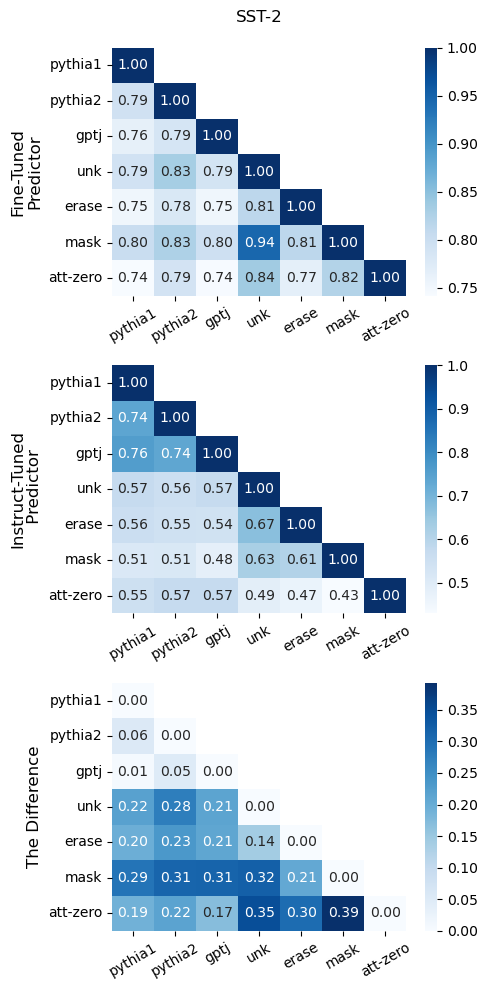

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


datasets = ["sst2","imdb","news"]
xticklabels = ["pythia1","pythia2","gptj","unk","erase","mask","att-zero"]
fig, ax = plt.subplots(3, 1, figsize=(5, 10))
mask = np.triu(np.ones_like(sst_ft_corr, dtype=bool),k=1)

sns.heatmap(sst_ft_corr ,mask=mask, cmap="Blues", annot=True,
            xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[0],fmt=".2f")
# sns.heatmap(imdb_ft_corr ,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[0,1],fmt=".2f")
# sns.heatmap(news_ft_corr ,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[0,2],fmt=".2f")

sns.heatmap(sst_it_corr,mask=mask, cmap="Blues", annot=True,
            xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[1],fmt=".2f")
# sns.heatmap(imdb_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[1,1],fmt=".2f")
# sns.heatmap(news_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[1,2],fmt=".2f")

sns.heatmap(sst_ft_corr - sst_it_corr,mask=mask, cmap="Blues", annot=True,
            xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[2],fmt=".2f")
# sns.heatmap(imdb_ft_corr - imdb_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[2,1],fmt=".2f")
# sns.heatmap(news_ft_corr - news_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[2,2],fmt=".2f")

for j in range(3):
    ax[j].tick_params(rotation =30,axis = "x")


cols = ['{}'.format(col) for col in ["SST-2\n","IMDB\n","AG-News\n"]]
rows = ['{}'.format(row) for row in ['Fine-Tuned\nPredictor', 'Instruct-Tuned\n Predictor', 'The Difference', ]]
ax[0].set_title("SST-2\n", fontsize = 12)

j = 0
for j in range(3):
    ax[j].set_ylabel(rows[j], rotation=90, size='large')
 

fig.tight_layout()
fig.savefig("correlation_spearman_rank_sst.pdf", bbox_inches='tight')


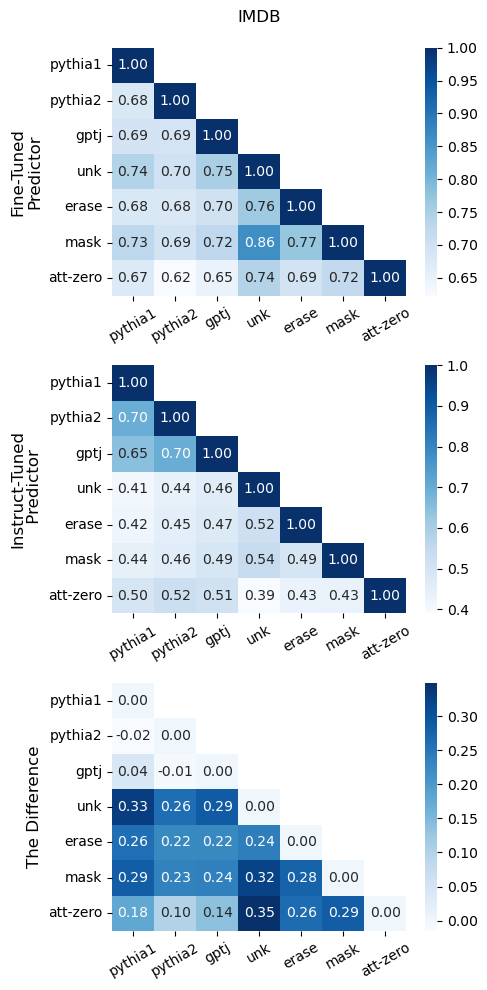

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


datasets = ["sst2","imdb","news"]
xticklabels = ["pythia1","pythia2","gptj","unk","erase","mask","att-zero"]
fig, ax = plt.subplots(3, 1, figsize=(5, 10))
mask = np.triu(np.ones_like(sst_ft_corr, dtype=bool),k=1)

# sns.heatmap(sst_ft_corr ,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[0],fmt=".2f")
sns.heatmap(imdb_ft_corr ,mask=mask, cmap="Blues", annot=True,
            xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[0],fmt=".2f")
# sns.heatmap(news_ft_corr ,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[0,2],fmt=".2f")

# sns.heatmap(sst_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[1],fmt=".2f")
sns.heatmap(imdb_it_corr,mask=mask, cmap="Blues", annot=True,
            xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[1],fmt=".2f")
# sns.heatmap(news_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[2],fmt=".2f")

# sns.heatmap(sst_ft_corr - sst_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[2],fmt=".2f")
sns.heatmap(imdb_ft_corr - imdb_it_corr,mask=mask, cmap="Blues", annot=True,
            xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[2],fmt=".2f")
# sns.heatmap(news_ft_corr - news_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[2,2],fmt=".2f")

for j in range(3):
    ax[j].tick_params(rotation =30,axis = "x")


cols = ['{}'.format(col) for col in ["SST-2\n","IMDB\n","AG-News\n"]]
rows = ['{}'.format(row) for row in ['Fine-Tuned\nPredictor', 'Instruct-Tuned\n Predictor', 'The Difference', ]]
ax[0].set_title("IMDB\n", fontsize = 12)

j = 0
for j in range(3):
    ax[j].set_ylabel(rows[j], rotation=90, size='large')
 

fig.tight_layout()
fig.savefig("correlation_spearman_rank_imdb.pdf", bbox_inches='tight')


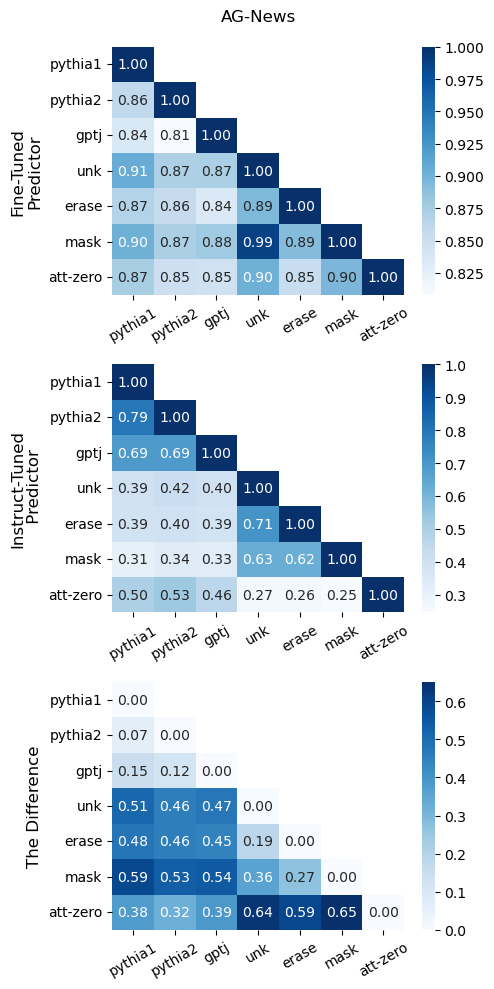

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


datasets = ["sst2","imdb","news"]
xticklabels = ["pythia1","pythia2","gptj","unk","erase","mask","att-zero"]
fig, ax = plt.subplots(3, 1, figsize=(5, 10))
mask = np.triu(np.ones_like(sst_ft_corr, dtype=bool),k=1)

# sns.heatmap(sst_ft_corr ,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[0],fmt=".2f")
# sns.heatmap(imdb_ft_corr ,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[0],fmt=".2f")
sns.heatmap(news_ft_corr ,mask=mask, cmap="Blues", annot=True,
            xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[0],fmt=".2f")

# sns.heatmap(sst_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[1],fmt=".2f")
# sns.heatmap(imdb_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[1],fmt=".2f")
sns.heatmap(news_it_corr,mask=mask, cmap="Blues", annot=True,
            xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[1],fmt=".2f")

# sns.heatmap(sst_ft_corr - sst_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[2],fmt=".2f")
# sns.heatmap(imdb_ft_corr - imdb_it_corr,mask=mask, cmap="Blues", annot=True,
#             xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[2],fmt=".2f")
sns.heatmap(news_ft_corr - news_it_corr,mask=mask, cmap="Blues", annot=True,
            xticklabels=xticklabels,yticklabels=xticklabels,ax=ax[2],fmt=".2f")

for j in range(3):
    ax[j].tick_params(rotation =30,axis = "x")


cols = ['{}'.format(col) for col in ["SST-2\n","IMDB\n","AG-News\n"]]
rows = ['{}'.format(row) for row in ['Fine-Tuned\nPredictor', 'Instruct-Tuned\n Predictor', 'The Difference', ]]
ax[0].set_title("AG-News\n", fontsize = 12)

j = 0
for j in range(3):
    ax[j].set_ylabel(rows[j], rotation=90, size='large')
 

fig.tight_layout()
fig.savefig("correlation_spearman_rank_news.pdf", bbox_inches='tight')
